<a href="https://colab.research.google.com/github/Dalthirr/NeuralNetworks/blob/EDA/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary packages

In [0]:
import numpy as np
import pandas as pd
import sklearn
import keras
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import  StandardScaler

Using TensorFlow backend.


In [0]:
#wczytujemy dane z repki
url = 'https://raw.githubusercontent.com/Dalthirr/NeuralNetworks/master/Churn_Modelling.csv'
df=pd.read_csv(url) #Pobieranie danych


Wywołam komendy head() info() i describe() by zobaczyć dane, z którymi będę pracować. Będę to powtarzać po każdej zmiannie na dataframe


In [0]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [0]:
df.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

**Dane** wyglądają na kompletne, w każdej kolumnie znajduje się tyle samo niepustych wierszy. Typy danych w kolumnach również się zgadzają, tzn. mamy int/float tam gdzie spodziewamy się liczb i object w miejscu stringów. Niektóre kolumny możnaby przeformatować z int64 na int16/bool w celu zwiększenia prędkości przetwarzania, ale nie jestem pewien czy dla 10000 rekordów różnica będzie zauważalna.

#### Opis zmiennych:
* **RowNumber** - numer wiersza, primary key data frame'a
* **CustomerId** - numer id klienta
* **Surname** - nazwisko klienta
* **CreditScore** - scoring kredytowy, liczba określająca wiarygodność kredytową klienta, im większy tym bardziej wiarygodny klient
* **Geography** - kraj pochodzenia klienta
* **Gender** - płeć
* **Age** - wiek
* **Tenure** - jak długo klient jest związany z bankiem(w latach)
* **Balance** - saldo bankowe klienta(w dolarach)
* **NumOfProducts** - liczba usług bankowych z których korzysta klient
* **HasCrCard** - zmienna określająca czy klient posiada w banku kartę kredytową, 1 = tak, 0 = nie
* **IsActiveMember** - czy klient jest aktywnym członkiem banku, 1 = tak, 0 = nie
* **EstimatedSalary** - szacowane roczne zarobki klienta(w dolarach)
* **Exited** - czy klient pozostał klientem banku,  1 = tak, 0 = nie, nasza zmienna objaśniana

In [0]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Wyrzucam wszystkie dane, które nie wpływają na pierwszy rzut oka na wynik

In [0]:
df.drop(["CustomerId", "Surname", "RowNumber"],
        axis=1).sort_values(by="EstimatedSalary").head(10)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2362,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1
9647,625,France,Male,31,5,0.00,2,0,1,90.07,0
9010,645,Germany,Female,59,8,121669.93,2,0,0,91.75,1
5548,710,France,Male,38,2,0.00,2,1,0,96.27,0
4989,629,France,Male,40,9,0.00,1,1,0,106.67,0
7565,708,France,Male,52,10,105355.81,1,1,0,123.07,1
2498,718,France,Male,37,8,0.00,2,1,1,142.81,0
8722,621,France,Male,35,7,87619.29,1,1,0,143.34,0
4774,811,France,Female,35,7,0.00,1,1,1,178.19,0
1451,551,France,Female,38,10,0.00,2,1,1,216.27,0


W danych nie ma żadnych braków i patrząc na statystyki opisowe dane liczbowe wyglądają sensownie, poza szacowanymi zarobkami, które mają sporo podejrzanie niskich wartości jak na zarobki roczne. Trzeba się zastanowić, czy niskie zarobki są wynikiem błędu w danych, czy może faktycznie klient ma niskie zarobki i jest na czyimś utrzymaniu/żyje z oszczędności. Jeśli uznamy to za błąd to trzeba będzie ustalić jakie najmniejsze zarobki mają sens i usunąć dane wszystkich klientów zarabiających mniej.

Pozostaje zakodować dane kategoryczne dotyczące płci i kraju pochodzenia. Użyję do tego dummy encodingu(one hot encoding z usunięciem pierwszej kolumny)

In [0]:
df = pd.concat([df, pd.get_dummies(df[["Gender", "Geography"]], drop_first=True)],
               sort=False, axis=1).drop(df[["Gender", "Geography"]], axis=1)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
RowNumber            10000 non-null int64
CustomerId           10000 non-null int64
Surname              10000 non-null object
CreditScore          10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null int64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int64
Gender_Male          10000 non-null uint8
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
dtypes: float64(2), int64(9), object(1), uint8(3)
memory usage: 966.9+ KB


In [0]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [0]:
#Wypiszę wartości unikalne dla każdej zmiennej. Chcę dzięki temu wychwycić możliwe missing values
for i in range(len(df.columns)):
        print(df.columns[i])
        print(pd.unique(df.iloc[0:,i]))

RowNumber
[    1     2     3 ...  9998  9999 10000]
CustomerId
[15634602 15647311 15619304 ... 15584532 15682355 15628319]
Surname
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 7

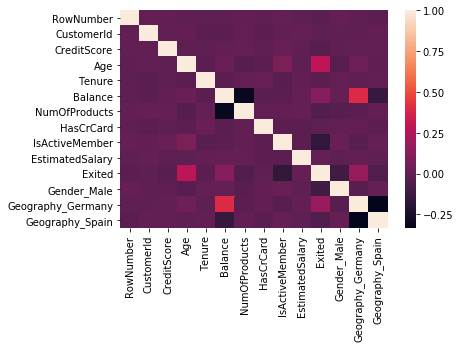

In [0]:
# Tworzę heatmapa korelacji pozostałych zmiennych. Odnoszę wrażenie, że są średnio skorelowane.
plt.show(sns.heatmap(df.corr(),xticklabels=df.corr().columns,
        yticklabels=df.corr().columns))

Heat map pokazaję nam, że nie na tyle dużej korelacji pomiędzy dwoma zmiennymi, że możemy sobie pozwolić odrzucenie jednej ze zmiennych.

**Narysuję histogramy zmiennch by zobaczyć ich rozkład.**

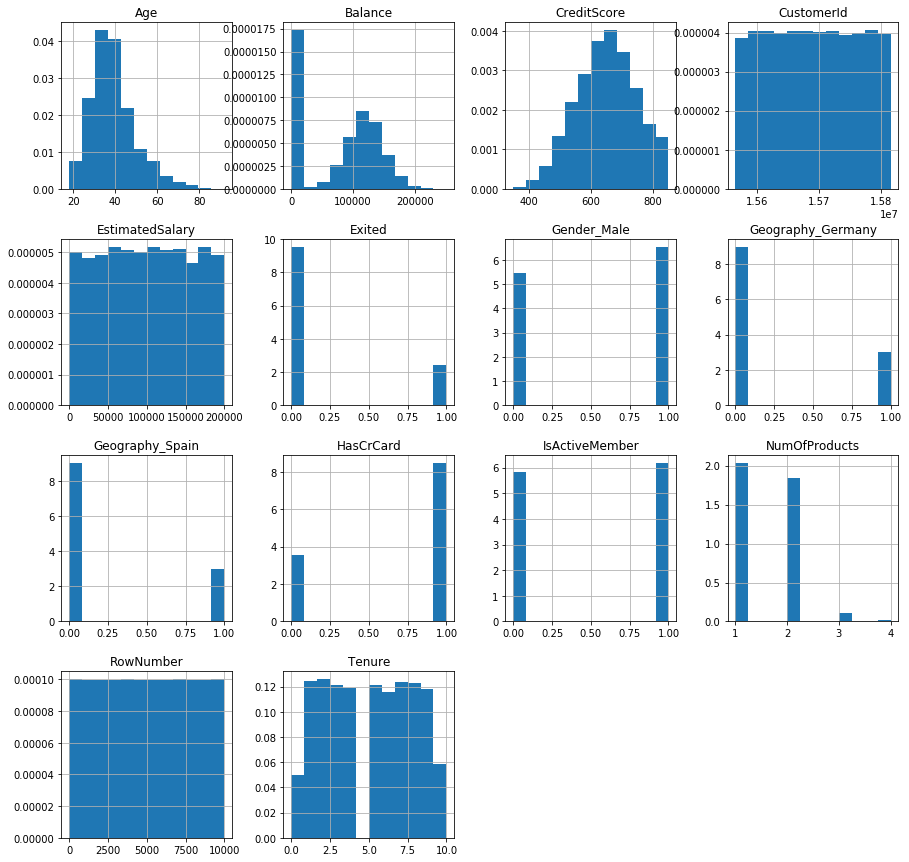

In [0]:
#Let's see distribution of all variables
df.hist(figsize=(15,15),bins = 12,density=True)
plt.title("Features Distribution")
plt.show()

Wykonam kilka pairplotow, by zobaczyć, jak różne cechy wpływają na nasz target.


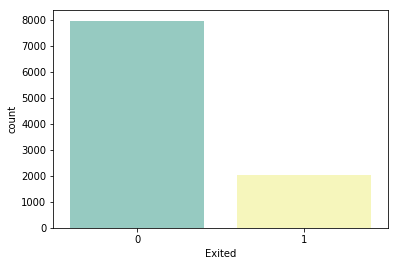

In [0]:
# Lets's count our target variable
ax = sns.countplot(x='Exited', data=df, palette='Set3')
df.loc[:,'Exited'].value_counts()
plt.show()

Jak widać zdecydowana większość badanych klientów zrezygnowała z usług banku.

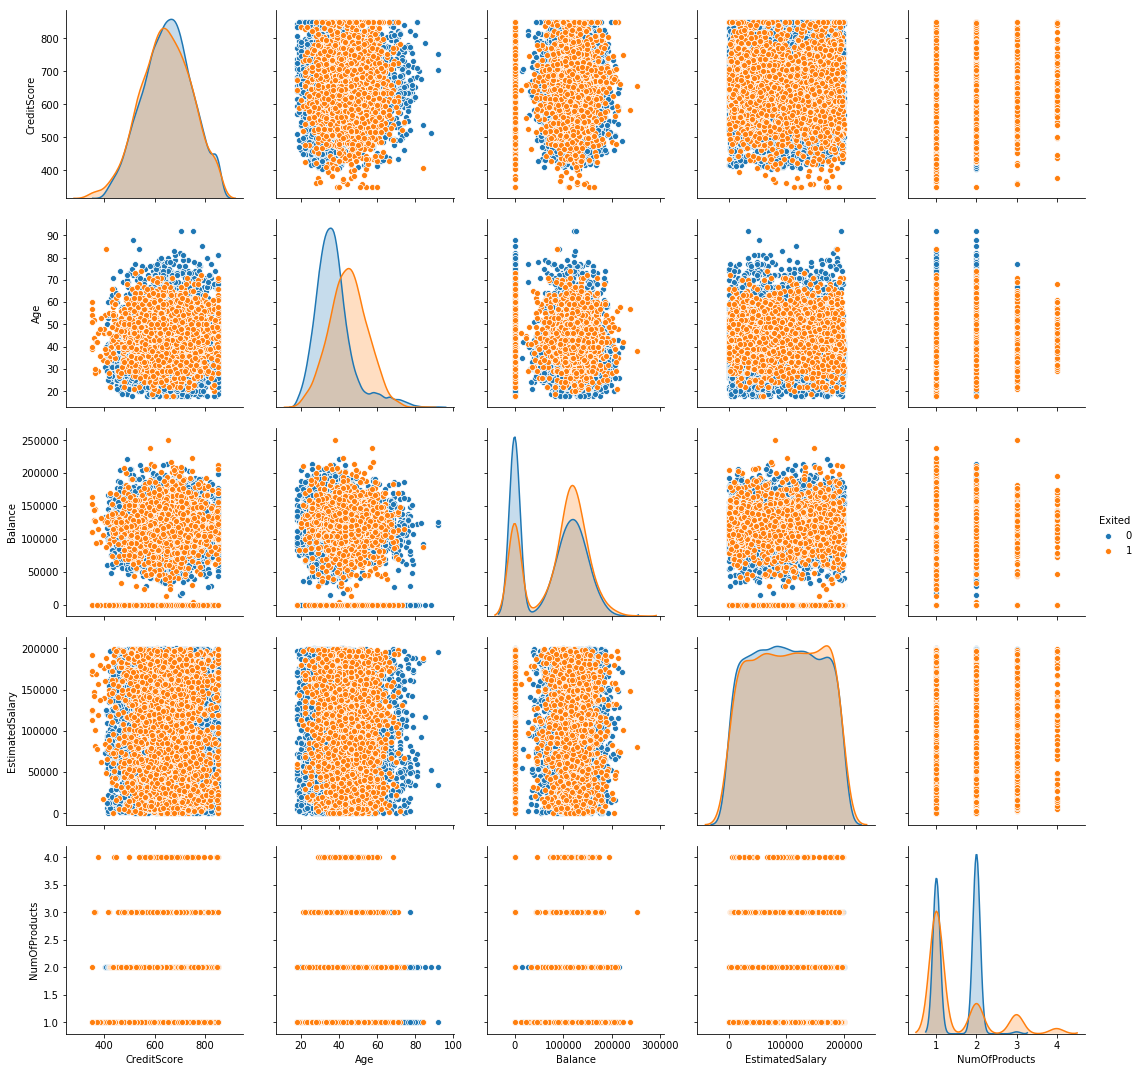

In [0]:
#Let's check pairplots for variables ['CreditScore','Age','Balance','EstimatedSalary','NumOfProducts']
# And see how our target is distibuted there
a=['CreditScore','Age','Balance','EstimatedSalary','NumOfProducts']
sns.pairplot(df,x_vars=a,y_vars=a,hue='Exited',diag_kind='auto',height=3)